In [2]:
import csv
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [202]:
data = csv.reader(open("./samples.csv"))

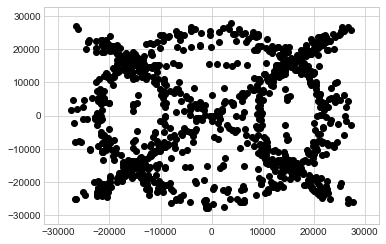

In [206]:
plt.xlim(-32768, 32768)
plt.ylim(-32768, 32768)

i = 0
for row in data:
    i += 1
    plt.plot(int(row[1]), int(row[2]), '-ok')
    if i == 1000:
        break

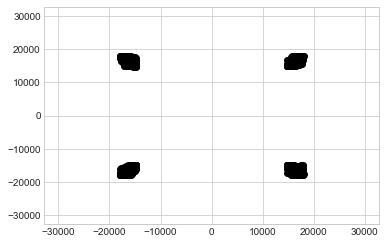

In [207]:
plt.xlim(-32768, 32768)
plt.ylim(-32768, 32768)

i = 0
center = 32768 / 2
sensi = 0.1
centerl = center - center * sensi
centerr = center + center * sensi

filtered = []
for row in data:
    i += 1
    x = int(row[1])
    y = int(row[2])
    
    if (centerl < abs(x) < centerr) and (centerl < abs(y) < centerr):
        plt.plot(x, y, '-ok')
        filtered.append(row)
    if i == 20000:
        break

"\nlinesbx = []\nlinesby = []\nfor row in filtered:\n    time = int(row[0])\n    linesax.append(time -minn)\n    linesay.append(int(row[1]))\n    linesbx.append(time - minn)\n    linesby.append(int(row[2]))\n\nplt.plot(linesax, linesay, 'r') #, '-ok')\nplt.plot(linesbx, linesby, 'b') #, '-ok')\n"

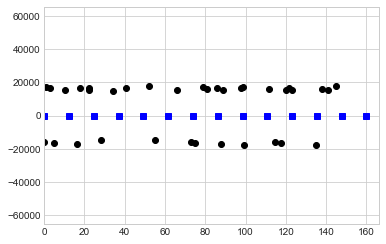

In [210]:

minn = min([int(d[0]) for d in filtered])
maxx = max([int(d[0]) for d in filtered])

oscil = 7800
samplerate = 96000

samplelenght = 1 / samplerate
oscillenght = 1 / oscil

mod = oscillenght / samplelenght

plt.xlim(0, (maxx - minn) / 120)
plt.ylim(-65535, 65535)

for i in range(0, 50):
    plt.plot(i * mod, 0.2, 'bs')
    
for row in filtered:
    time = int(row[0])
    plt.plot((time -minn) % (mod * 600 ), int(row[1]), '-ok')
    plt.plot((time - minn) % (mod * 600 ), (int(row[2])))

"""
linesbx = []
linesby = []
for row in filtered:
    time = int(row[0])
    linesax.append(time -minn)
    linesay.append(int(row[1]))
    linesbx.append(time - minn)
    linesby.append(int(row[2]))

plt.plot(linesax, linesay, 'r') #, '-ok')
plt.plot(linesbx, linesby, 'b') #, '-ok')
"""

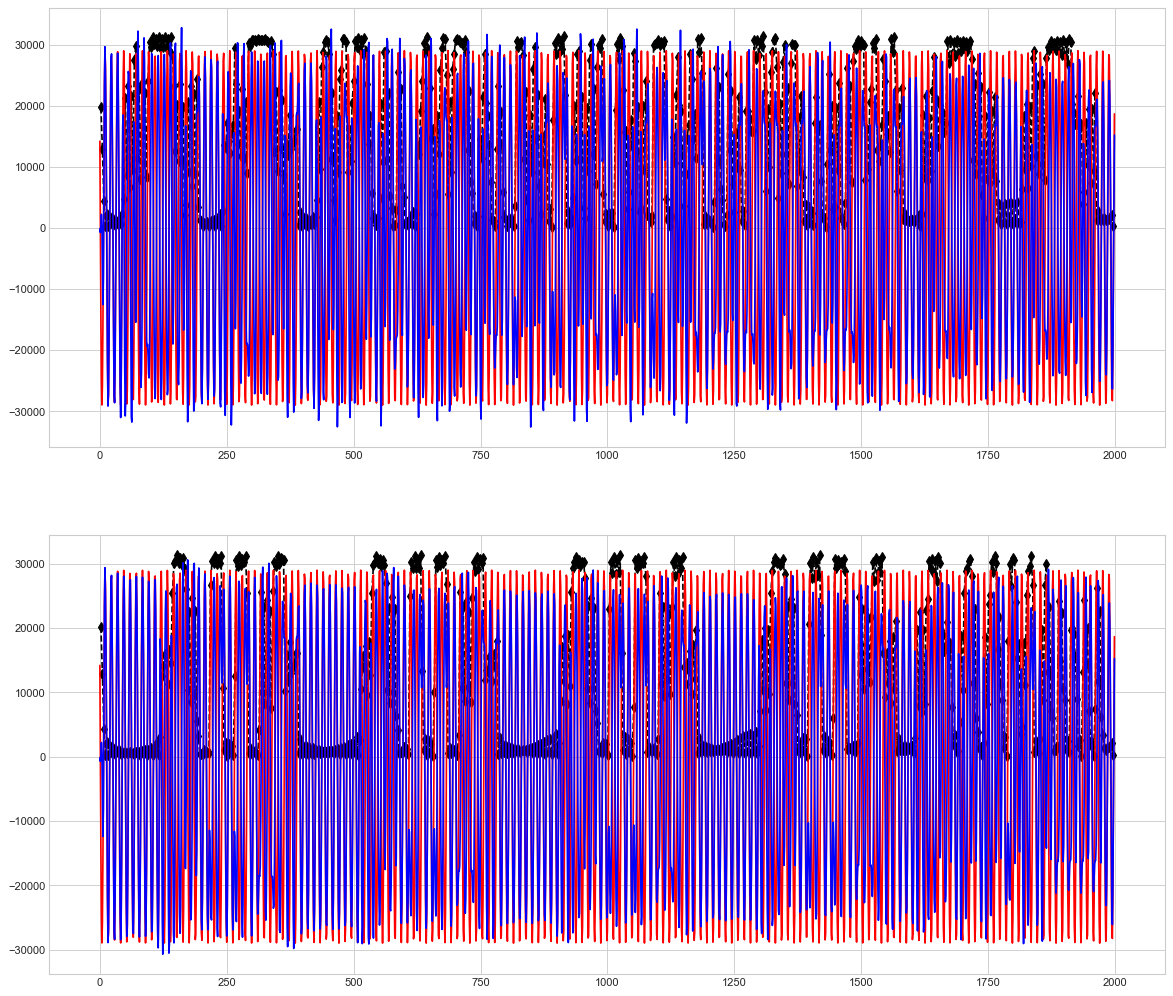

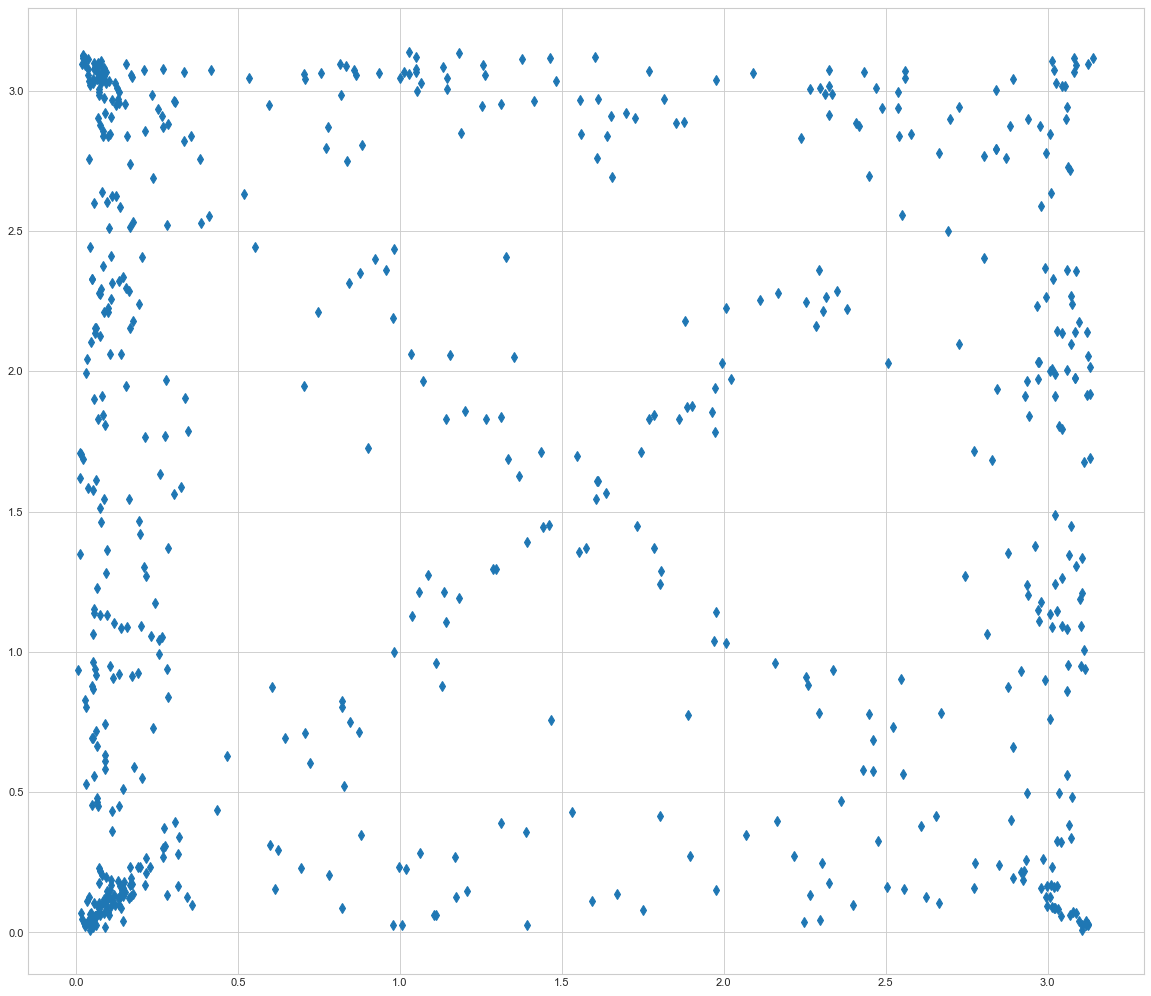

In [44]:
data = csv.reader(open("./samples.csv"))
import math

import numpy as np

oscil = 7963.5

samplerate = 96000


samplelenght = 1 / samplerate
oscillenght = 1 / oscil

mod = (oscillenght / samplelenght)

i = 0

x= []
y = []

xa= []
ya = []

ys = []
xs =[]

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


offset = 1

sin = []
wav = []
rex = []
rey = []


bsin = []
bwav = []
brex = []
brey = []

xo = []
yo = []

def filter(x):
    quotien = 30000
    
    if x < 10000: 
        return 0
    if x > 22000:
        return  quotien
    return quotien / 2
    
for row in data:
    i += 1
    time = int(row[0])
    left = int(row[1])
    right = int(row[2])
    
    x.append(time)
    y.append(right)
    
    xa.append(time)
    ya.append(left)
    
    sine = math.sin((time - offset) * mod) * 29000

    xs.append(time)
    ys.append(sine)
    
    sin.append(sine)
    wav.append(left)
    
    
    bsin.append(sine)
    bwav.append(right)

    if (time + offset) % round(mod / 4) == 0:
        corr = np.arccos(np.dot(sin, wav) / (np.linalg.norm(sin)*np.linalg.norm(wav)))
        xo.append(corr) #filter(corr))
        rex.append(time)
        rey.append(corr * 10000)
        sin = []
        wav = []
        
        corr = np.arccos(np.dot(bsin, bwav) / (np.linalg.norm(bsin)*np.linalg.norm(bwav)))
        yo.append(corr) #filter(corr))
        brex.append(time)
        brey.append(corr * 10000)
        bsin = []
        bwav = []
    
    # possible cycle len
    #if (time + offset) % round(mod) == 6: 
    #    ax2.plot([time, time], [-30000, 30000], '--kd')
    #    ax1.plot([time, time], [-30000, 30000], '--kd')

    if i == 2000:
        break


ax2.plot(rex, rey, '--kd')
ax1.plot(brex, brey, '--kd')

ax1.plot(xs, ys, 'r')
ax1.plot(x, y, 'b')

ax2.plot(xs, ys, 'r')
ax2.plot(xa, ya, 'b')

fig2 = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
o = fig2.add_subplot(111)
o.plot(xo, yo, 'd')